# Задание 6

## Деревья решений и ансамбли на их основе

**Цель работы:**
1. Освоить принципы построения и настройки дерева решений с помощью sklearn.tree.DecisionTreeClassifier.
2. Познакомиться с базовыми ансамблевыми методами: Бэггинг (Bagging) и Бустинг (Boosting).
3. Сравнить эффективность одиночного дерева и ансамблей на практическом примере.

Выполним анализ набора данных «Прогноз заработной платы». Этот набор данных предоставляет информацию о размере заработной платы
работников.
Описание полей:

* **age** – возраст
* **workclass** – класс работы
* **education** – образование
* **education-num** –
* **marital-status** – семейное положение
* **occupation** – вид деятельности
* **relationship** – степень родства
* **race** – раса
* **sex** – пол
* **capital-gain** – прирост капитала
* **capital-loss** – убыток капитала
* **hours-per-week** – часов в неделю
* **native-country** – страна происхождения
* **salary** – зарплата
* **fnlwgt** – колонка, которая показывает сколько людей с такими
же характеристиками существует. Например:

* **sex**: Male

* **age**: 43

* **marital-status**: Maried

* **fnlwgt**: 1000

Это значит, что среди работников насчитывается 1000 таких 43-летних женатых мужчин

### 1. Импортируем необходимые библиотеки

In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 2. Загрузка и первичный анализ данных

In [42]:
data = pd.read_csv('salary.csv')

# целевая переменная 'salary': <=50K -> 0, >50K -> 1
data['salary'] = data['salary'].map({' <=50K': 0, ' >50K': 1})

# отделяем признаки и целевую переменную
X = data.drop('salary', axis=1)
y = data['salary']

# Преобразуем категориальные признаки в числовые с помощью one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Первичный анализ
print(f'Размерность признаков: {X.shape}')
print(f'Размерность целевой переменной: {y.shape}')
print(f'Уникальные классы: {y.unique()}')
print('\nПервые 5 строк признаков:')
X.head()


Размерность признаков: (32561, 100)
Размерность целевой переменной: (32561,)
Уникальные классы: [0 1]

Первые 5 строк признаков:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### 3. Разделение данных на обучающую и тестовую выборки

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')

Размер обучающей выборки: (26048, 100)
Размер тестовой выборки: (6513, 100)


### 4. Построение и оценка базового дерева решений

Точность базового дерева на тесте: 0.8136


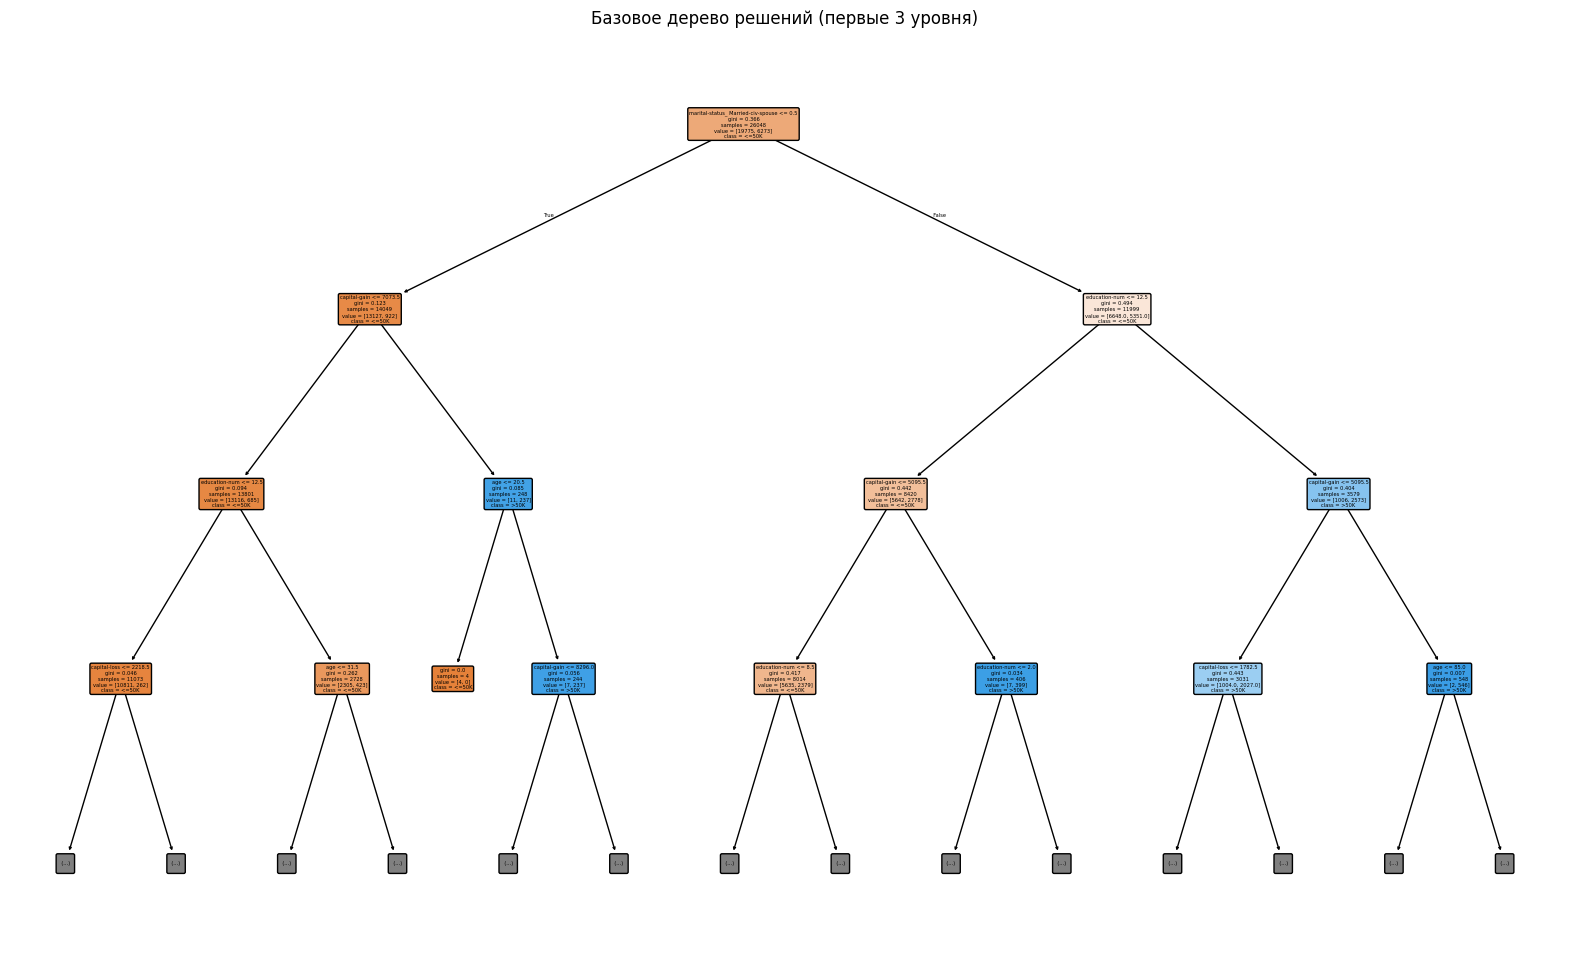

In [44]:
base_dt = DecisionTreeClassifier(random_state=42)
base_dt.fit(X_train, y_train)

y_pred_base = base_dt.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f'Точность базового дерева на тесте: {accuracy_base:.4f}')

# Визуализация дерева (первые 3 уровня)
plt.figure(figsize=(20, 12))
plot_tree(base_dt, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'], rounded=True, max_depth=3)
plt.title('Базовое дерево решений (первые 3 уровня)')
plt.show()

### 5. Борьба с переобучением: настройка гиперпараметров

Точность настроенного дерева (max_depth=5) на тесте: 0.8494
Кросс-валидация, базовое дерево: 0.8115 (+/- 0.0097)
Кросс-валидация, настроенное дерево: 0.8479 (+/- 0.0108)


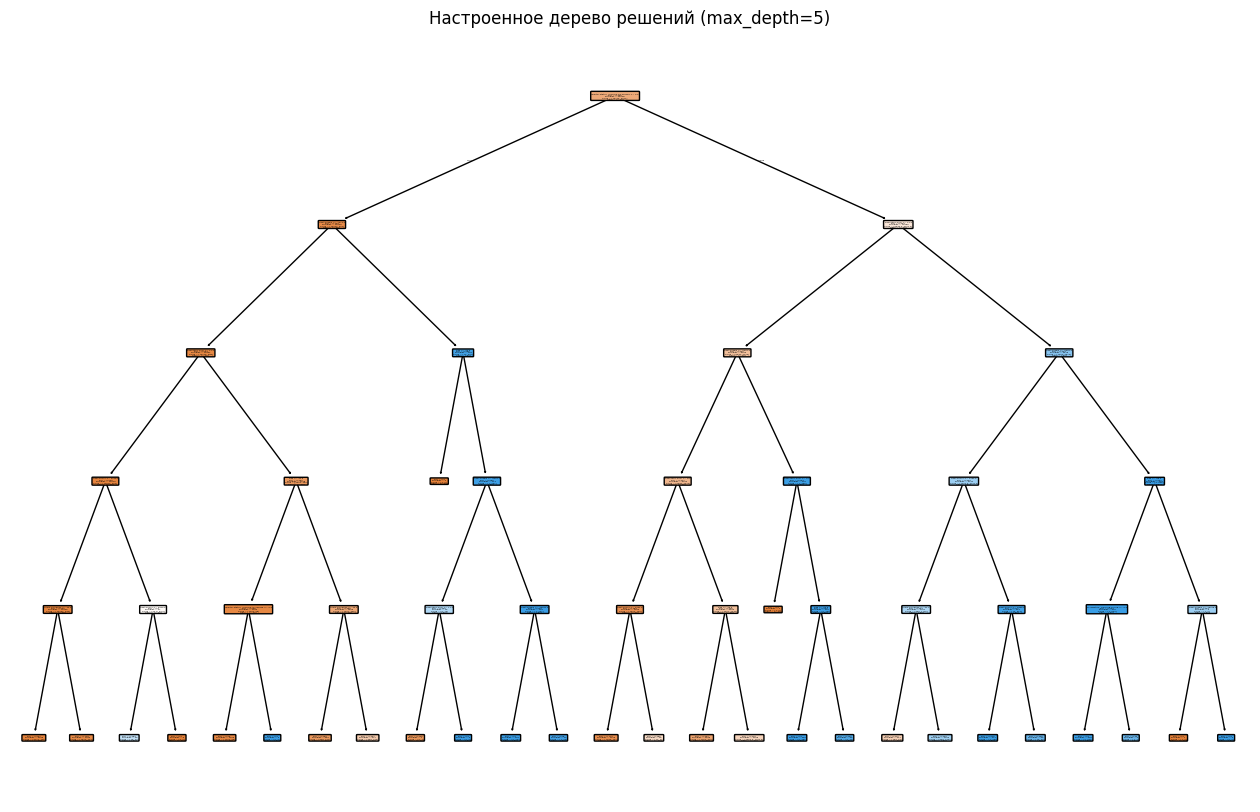

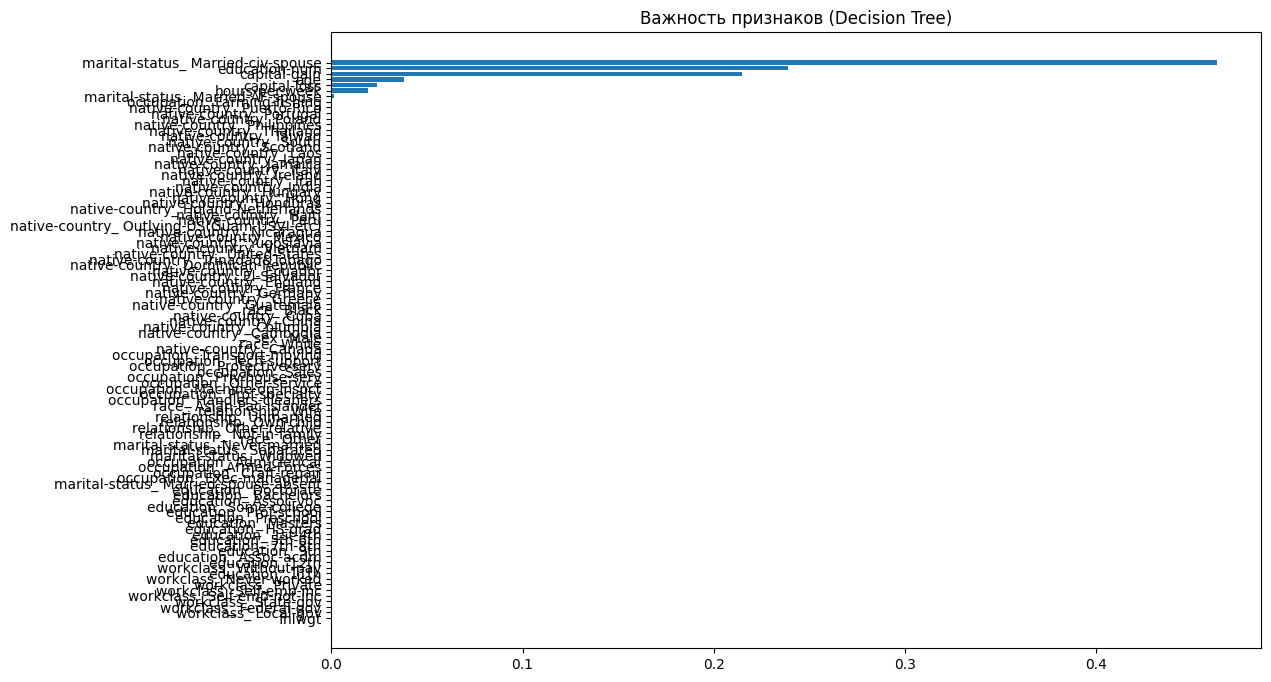

In [45]:
tuned_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
tuned_dt.fit(X_train, y_train)

y_pred_tuned = tuned_dt.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Точность настроенного дерева (max_depth=5) на тесте: {accuracy_tuned:.4f}')

# Кросс-валидация
cv_scores_base = cross_val_score(base_dt, X, y, cv=5)
cv_scores_tuned = cross_val_score(tuned_dt, X, y, cv=5)
print(f'Кросс-валидация, базовое дерево: {np.mean(cv_scores_base):.4f} (+/- {np.std(cv_scores_base)*2:.4f})')
print(f'Кросс-валидация, настроенное дерево: {np.mean(cv_scores_tuned):.4f} (+/- {np.std(cv_scores_tuned)*2:.4f})')

# Визуализация настроенного дерева
plt.figure(figsize=(16, 10))
plot_tree(tuned_dt, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'], rounded=True)
plt.title('Настроенное дерево решений (max_depth=5)')
plt.show()

# Важность признаков
importances = tuned_dt.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title('Важность признаков (Decision Tree)')
plt.barh(range(len(X.columns)), importances[indices])
plt.yticks(range(len(X.columns)), [X.columns[i] for i in indices])
plt.gca().invert_yaxis()
plt.show()


### 6. Ансамбли: Случайный лес (Bagging)

In [46]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [47]:

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Точность случайного леса на тесте: {accuracy_rf:.4f}')

Точность случайного леса на тесте: 0.8607



Отчет по классификации (Random Forest):
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4945
        >50K       0.75      0.63      0.69      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



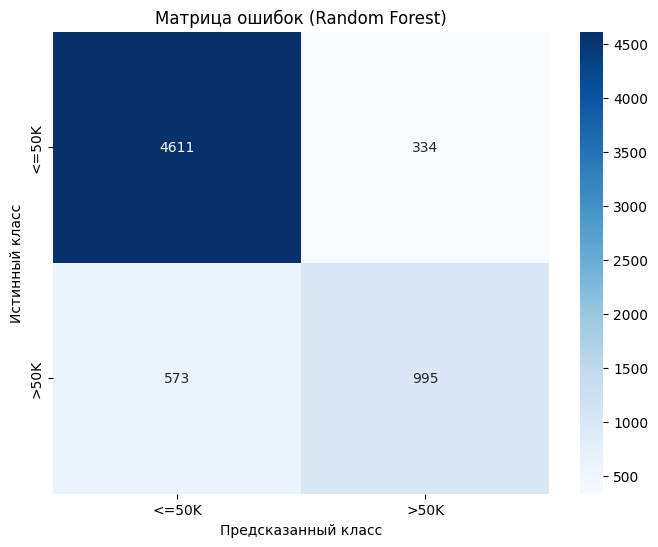

In [48]:

print('\nОтчет по классификации (Random Forest):')
print(classification_report(y_test, y_pred_rf, target_names=['<=50K', '>50K']))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок (Random Forest)')
plt.show()

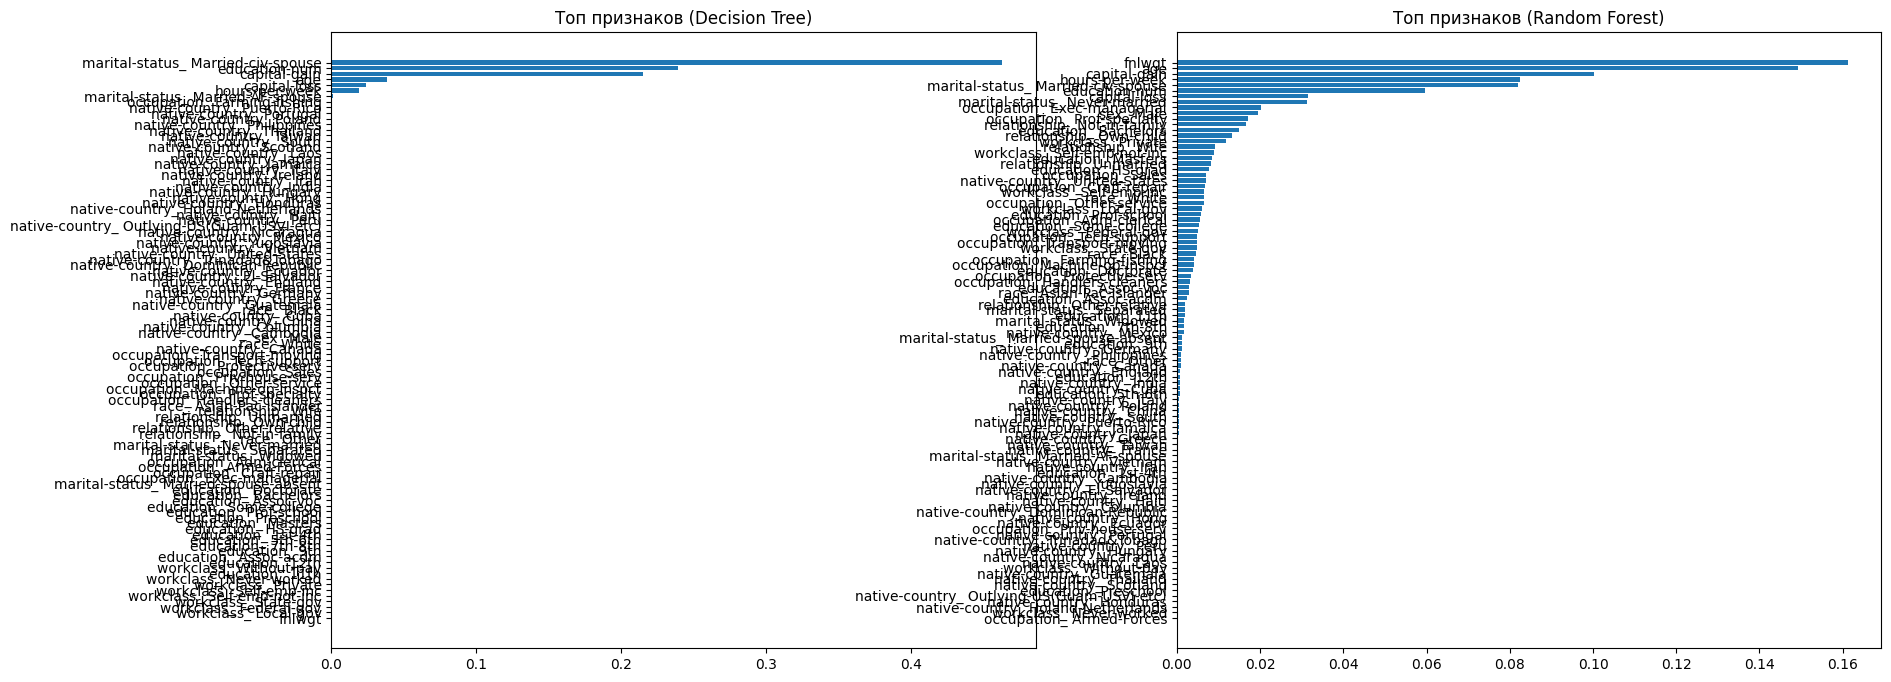

In [49]:
# Важность признаков (сравнение с деревом)
rf_importances = rf.feature_importances_
indices_rf = np.argsort(rf_importances)[::-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
ax1.barh(range(len(X.columns)), importances[indices])
ax1.set_title('Топ признаков (Decision Tree)')
ax1.set_yticks(range(len(X.columns)))
ax1.set_yticklabels([X.columns[i] for i in indices])
ax1.invert_yaxis()

ax2.barh(range(len(X.columns)), rf_importances[indices_rf])
ax2.set_title('Топ признаков (Random Forest)')
ax2.set_yticks(range(len(X.columns)))
ax2.set_yticklabels([X.columns[i] for i in indices_rf])
ax2.invert_yaxis()
plt.show()

### 7. Ансамбли: Градиентный бустинг (Boosting)

In [50]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Точность Gradient Boosting на тесте: {accuracy_gb:.4f}')

Точность Gradient Boosting на тесте: 0.8693


### 8. Сравнение всех моделей

                     Train Accuracy  Test Accuracy
Base Decision Tree         0.999962       0.813604
Tuned Decision Tree        0.846130       0.849378
Random Forest              0.999962       0.860740
Gradient Boosting          0.869472       0.869338


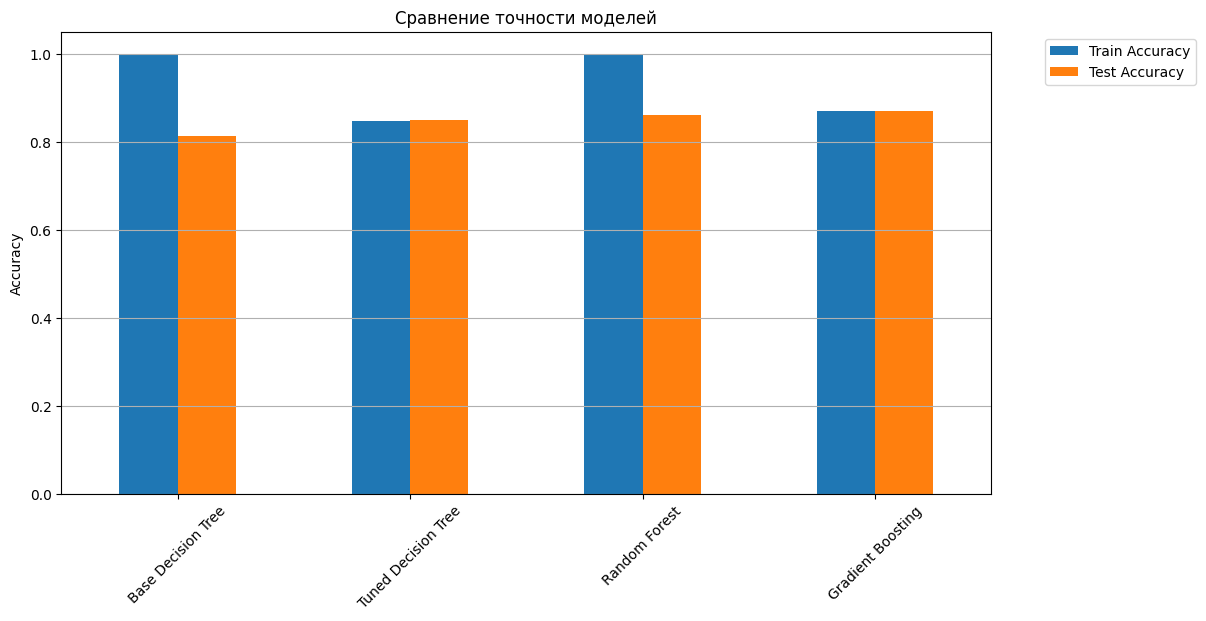

In [51]:
models = {'Base Decision Tree': base_dt,
          'Tuned Decision Tree': tuned_dt,
          'Random Forest': rf,
          'Gradient Boosting': gb}

results = {}
for name, model in models.items():
    if name not in ['Base Decision Tree', 'Tuned Decision Tree']:
        model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    results[name] = {'Train Accuracy': train_acc, 'Test Accuracy': test_acc}

results_df = pd.DataFrame(results).T
print(results_df)

results_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(12,6))
plt.title('Сравнение точности моделей')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis='y')
plt.show()

### 9. Подбор гиперпараметров (GridSearchCV)

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [53]:
print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Лучшая точность кросс-валидации: {grid_search.best_score_:.4f}')

Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Лучшая точность кросс-валидации: 0.8636


In [54]:
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Точность улучшенной модели на тестовой выборке: {best_accuracy:.4f}')

Точность улучшенной модели на тестовой выборке: 0.8670
